### This notebook is for the method section and RQ0

In [ ]:
# Import used packages and configurations
%matplotlib inline
import seaborn as sns; #sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import scipy
style.use('fast')

sns.set_style('ticks',{'legend.frameon':True} )
sns.set_palette('colorblind')

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['text.usetex'] = True

plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['axes.labelsize']= 22

PALETTE_BASE = sns.color_palette('muted', n_colors=12)
blue=PALETTE_BASE[0]
green=PALETTE_BASE[1] 
red=PALETTE_BASE[2] 
purple=PALETTE_BASE[3]
version_colors=['orange',red, 'gray']

exclude_prefixes = ('@ryancavanaugh/pkg', 'all-packages-', 'cool-', 'neat-', 'wowdude-', 'npmdoc-', 'npmtest-', 'npm-ghost-',)
exclude_suffixes = ('-cdn',)
exclude_ghost = r'^ghost-\d+$'

# LOAD DATA

In [14]:
# This dataframe is already prepared
technical_lag=pd.read_csv('../../../jsep2018/csv/packages/technical_lag_clean.csv', 
                          sep=';', dtype=object, index_col=None,  error_bad_lines=False)
print(len(technical_lag))
technical_lag.head(2)

51351426


,date,dependency,kind,package,version,version_lag
0,2015-11-11,0,runtime,shaybagants-test,1.0.0,"0,0,0"
1,2015-11-11,0,runtime,shaybagants-test,2.0.0,"0,0,0"


In [3]:
# Remove optional deps
technical_lag=technical_lag.query('kind!="Optional"')
technical_lag['kind']=technical_lag['kind'].apply(lambda x: x.capitalize())


In [4]:
# Remove pre-releases
technical_lag = technical_lag[~technical_lag.version.str.contains('-')]

In [5]:
# Remove spam packages
technical_lag=technical_lag[~technical_lag['package'].str.startswith(exclude_prefixes)]
technical_lag=technical_lag[~technical_lag['package'].str.endswith(exclude_suffixes)]
technical_lag=technical_lag[~technical_lag['package'].str.match(exclude_ghost)]

In [16]:
len(technical_lag)

45178711

#### METHOD 

In [58]:
# This is to calculate all dependencies before calculating the technical lag.
deps=pd.read_csv('../../../jsep2018/csv/packages/dependencies_npm_march.csv', sep=';', dtype=object, index_col=None,  error_bad_lines=False)

In [3]:
print('all dataset',len(deps),'\n',
      'number of packages',deps.package.drop_duplicates().size,'\n',
      'number of versions',len(deps[['package','version']].drop_duplicates()))

52840196 547335 4015178


In [6]:
# Remove pre-releases
deps = deps[~deps.version.str.contains('-')]

In [7]:
# remove spam packages
deps['package']=deps['package'].apply(str)
deps=deps[~deps['package'].str.startswith(exclude_prefixes)]
deps=deps[~deps['package'].str.endswith(exclude_suffixes)]
deps=deps[~deps['package'].str.match(exclude_ghost)]

In [8]:
# After filtering
print('all dataset',len(deps),'\n',
      'number of packages',deps.package.drop_duplicates().size,'\n',
      'number of versions',len(deps[['package','version']].drop_duplicates()))

all dataset 46016524 
 number of packages 520547 
 number of versions 3637973


In [17]:

print('number of dependencies of which we could compute their lag',(len(technical_lag)/len(deps))

0.9817932141071759

In [10]:
deps.groupby('kind').count() # number of dependencies per kind

,package,version,dependency,constraint,date,release_type
kind,,,,,,
Development,26650808,26650808,26650054,26650808,26650808,26650808
Optional,281,281,281,281,281,281
runtime,19365435,19365435,19349220,19365435,19365435,19365435


In [11]:
deps.groupby('kind').count()/len(deps) # proportion of dependencies per kind

,package,version,dependency,constraint,date,release_type
kind,,,,,,
Development,0.579157,0.579157,0.579141,0.579157,0.579157,0.579157
Optional,0.000006,0.000006,0.000006,0.000006,0.000006,0.000006
runtime,0.420837,0.420837,0.420484,0.420837,0.420837,0.420837


In [72]:
# The considered period for the analysis
first_date="2010-12-20"
last_date="2018-03-12"
date_period = pd.to_datetime(first_date), pd.to_datetime(last_date)

# RQ0

In [20]:
# proportion and number of dependencies per kind and constraint type
df_tmp=technical_lag.groupby(['constraint_type','kind']).count()[['version']].reset_index()

In [25]:
# Constraints for each kind
for kind in ['Development','Runtime']:
    df_tmp=(technical_lag
            .query('kind == "'+kind+'"')
            .groupby(['constraint_type','kind'])
            .count()[['version']]
            .reset_index()
           )
    print(df_tmp)

  constraint_type         kind   version
0           caret  Development  19306123
1          latest  Development    912282
2           other  Development    586684
3          strict  Development   3484110
4           tilde  Development   1810070
  constraint_type     kind   version
0           caret  Runtime  12886260
1          latest  Runtime    758723
2           other  Runtime    821024
3          strict  Runtime   3052352
4           tilde  Runtime   1561083


In [29]:
# Constraints for each kind %
for kind in ['Development','Runtime']:
    df_tmp=(technical_lag
            .query('kind == "'+kind+'"')
            .groupby(['constraint_type'])
            .count()[['version']]
            .reset_index()
           )
    l=float(len(technical_lag.query('kind == "'+kind+'"')))
    df_tmp['version']=df_tmp['version'].apply(lambda x: x*100.0/l)
    print(df_tmp)

  constraint_type    version
0           caret  73.971892
1          latest   3.495431
2           other   2.247894
3          strict  13.349454
4           tilde   6.935328
  constraint_type    version
0           caret  67.540026
1          latest   3.976652
2           other   4.303187
3          strict  15.998120
4           tilde   8.182016


In [30]:
df_tmp=(technical_lag
        .groupby(['constraint_type'])
        .count()[['version']]
        .reset_index()
       )
l=float(len(technical_lag))
df_tmp['version']=df_tmp['version'].apply(lambda x: x*100.0/l)
print(df_tmp)

  constraint_type    version
0           caret  71.255647
1          latest   3.698656
2           other   3.115866
3          strict  14.468013
4           tilde   7.461818


In [31]:
df_tmp=(technical_lag
        .groupby(['constraint_type'])
        .count()[['version']]
        .reset_index()
       )
print(df_tmp)

  constraint_type   version
0           caret  32192383
1          latest   1671005
2           other   1407708
3          strict   6536462
4           tilde   3371153


In [28]:
technical_lag.groupby('kind').count()[['version']]/len(technical_lag)

,version
kind,
Development,0.57769
Runtime,0.42231


In [15]:
df_tmp.groupby(['constraint_type']).sum()

,constraint
constraint_type,
caret,70.562211
latest,2.947625
other,3.399907
strict,15.934057
tilde,7.156200


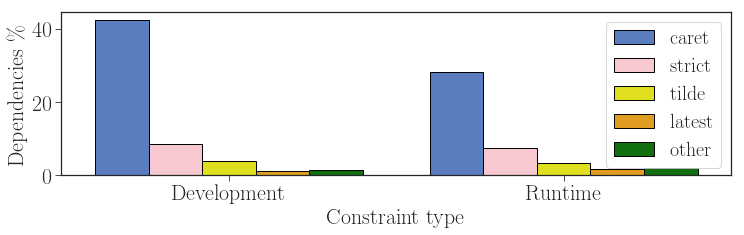

In [20]:
ax = sns.barplot(x="kind", y="constraint", hue="constraint_type", palette=[blue,"pink",'yellow','orange','green'], data=df_tmp,
                hue_order=['caret','strict','tilde','latest','other'])
ax.figure.set_size_inches(12,3)
ax.set_xlabel('Constraint type')
ax.set_ylabel('Dependencies \%')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.legend( loc='upper right', bbox_to_anchor=(1, 1), fontsize=20)#,ncol=3)#, fancybox=True, shadow=True)

# RQ0 part2
This part is study when constraints are updated and how often packages are updated

In [ ]:
technical_lag['date_used_version']=pd.to_datetime(technical_lag['date_used_version'])
technical_lag['date_last_available']=pd.to_datetime(technical_lag['date_last_available'])

In [ ]:
technical_lag['time_lag']=technical_lag['date_last_available'] - technical_lag['date_used_version']
technical_lag.drop(['date_last_available','date_used_version'], axis=1, inplace=True)

In [ ]:
technical_lag=technical_lag[['package','version','date','dependency','constraint','kind','constraint_type','time_lag','version_lag']]

In [ ]:
next_lag = technical_lag

In [ ]:
next_lag['dependency_next']=next_lag.dependency.shift(-1)
next_lag['time_lag_next']=next_lag.time_lag.shift(-1)
next_lag['constraint_type_next']=next_lag.constraint_type.shift(-1)
next_lag['date_next']=next_lag.date.shift(-1)
next_lag['package_next']=next_lag.package.shift(-1)
next_lag['version_next']=next_lag.version.shift(-1)
next_lag['constraint_next']=next_lag.constraint.shift(-1)

In [ ]:
next_lag=next_lag.query('dependency==dependency_next and package==package_next')

In [ ]:
next_lag.sort_values(['package','dependency','date'], ascending=True, inplace=True)

In [28]:
versions=pd.read_csv('../../../jsep2018/csv/versions_npm_march.csv', sep=';', 
                     dtype=object, index_col=None,  error_bad_lines=False)
print(len(versions))
versions.head(2)

4760450


,package,version,date,release_type,semver,Major,Minor,Patch
0,0,0.0.0,2014-04-01,initial,0.0.0,0,0,0
1,0-,0.0.1,2017-03-06,initial,0.0.1,0,0,1


In [19]:
versions['package']=versions['package'].apply(str)

In [20]:
versions=versions[~versions['package'].str.startswith(exclude_prefixes)]
versions=versions[~versions['package'].str.endswith(exclude_suffixes)]
versions=versions[~versions['package'].str.match(exclude_ghost)]

# When do packages UPDATE constraint, in general?

In [8]:
df_tmp=next_lag[['package','version','version_next','date','date_next','kind','dependency','constraint','constraint_next','constraint_type','constraint_type_next']]


In [9]:
versions=versions[['package','version','release_type']]
df_tmp=df_tmp.query('constraint != constraint_next')
df_tmp=df_tmp[['package','version','version_next','date','date_next','kind','dependency','constraint_type','constraint_type_next']]

In [10]:
df_tmp['package']=df_tmp['package'].apply(str)
df_tmp['version']=df_tmp['version'].apply(str)
df_tmp['version_next']=df_tmp['version_next'].apply(str)

versions['package']=versions['package'].apply(str)
versions['version']=versions['version'].apply(str)

In [11]:
df_tmp=(df_tmp
        .set_index(['package','version'])
       .merge(versions
              .set_index(['package','version']),
              left_index=True,
              right_index=True,
              how='left')
        .dropna()
        .reset_index()
       )
len(df_tmp)

2219878

In [12]:
df_tmp_update=(df_tmp
        .set_index(['package','version_next'])
       .merge(versions
              .rename(columns={'version':'version_next','release_type':'release_type_next'})
              .set_index(['package','version_next']),
              left_index=True,
              right_index=True,
              how='left')
        .dropna()
        .reset_index()
       )
len(df_tmp_update)

2219878

In [13]:
df_tmp2=df_tmp_update.groupby(['package','version','release_type','release_type_next']).count()[['dependency']].reset_index()
df_tmp2.head(2)

,package,version,release_type,release_type_next,dependency
0,0.0.0-development,1.0.0,initial,patch,1
1,0.workspace,0.0.15,patch,patch,1


In [14]:
print(df_tmp2.query('release_type_next=="patch"').dependency.median(),
      df_tmp2.query('release_type_next=="minor"').dependency.median(),
      df_tmp2.query('release_type_next=="major"').dependency.median()
     )

1.0 2.0 2.0


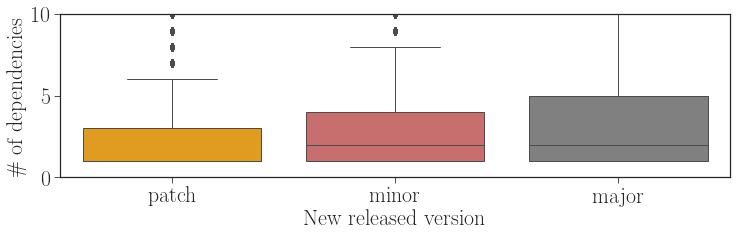

In [15]:
# When constraints are updated
ax = sns.boxplot(x="release_type_next", 
                 y="dependency", 
                 data=df_tmp2, 
                 order=['patch','minor','major'],
                 palette=version_colors, linewidth=1)
ax.figure.set_size_inches(12,3)
ax.set_xlabel("New released version")
ax.set_ylabel('\# of dependencies')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.set_ylim(0,10)
ax.legend(loc='upper right', bbox_to_anchor=(0.8, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
#ax.figure.savefig('/home/neglectos/Desktop/jsep18technicallag/figures/update_constraints.eps', bbox_inches='tight', facecolor='white')

# How often packages are updated

In [21]:
tab=[]
tmp=pd.DataFrame()
for release in ['initial','patch','minor','major']:
    for next_release in ['patch','minor','major']:
        tmp=versions.query('release_type=="'+release+'" or release_type=="'+next_release+'"')
        
        tmp['date_next']=tmp.date.shift(-1)
        tmp['release_type_next']=tmp.release_type.shift(-1)
        tmp['package_next']=tmp.package.shift(-1)
        
        tmp=tmp.query('package==package_next')
        tmp=tmp.query('release_type=="'+release+'" and release_type_next=="'+next_release+'"')
        tab.append(tmp)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [23]:
df_tmp=pd.concat(tab)
df_tmp['date']=pd.to_datetime(df_tmp['date'])
df_tmp['date_next']=pd.to_datetime(df_tmp['date_next'])

df_tmp['time']=(df_tmp['date_next'] - df_tmp['date']).dt.days

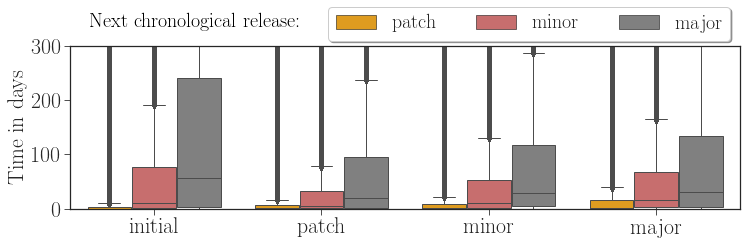

In [27]:
# How often packages are updated
ax = sns.boxplot(x="release_type", 
                 y="time", 
                 data=df_tmp, 
                 hue='release_type_next', hue_order=['patch','minor','major'],
                 order=['initial','patch','minor','major'],
                 palette=version_colors, linewidth=1)
ax.figure.set_size_inches(12,3)
ax.set_xlabel("")
ax.set_ylabel('Time in days')
for patch in ax.patches:
    patch.set_edgecolor('black')
ax.set_ylim(0,300)
ax.text(0.03, 1.2, 'Next chronological release: ', transform=ax.transAxes, fontsize=20,
        verticalalignment='top', color='black')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.3), ncol=3, fontsize=20, fancybox=True, shadow=True)
ax.figure.savefig('/home/neglectos/Desktop/jsep18technicallag/figures/next_release.eps', bbox_inches='tight', facecolor='white')

# How many 0.x.y are used with caret and tilde

In [6]:
mask = technical_lag.used_version.str.startswith('0.')
technical_lag = technical_lag [mask].query('constraint_type =="tilde" or constraint_type == "caret"')

In [8]:
len(technical_lag)/45178711

0.1714223984832148

In [13]:
technical_lag.groupby(['constraint_type']).count()/len(technical_lag)

,kind,package,used_version,version
constraint_type,,,,
caret,0.812838,0.812838,0.812838,0.812838
tilde,0.187162,0.187162,0.187162,0.187162
